In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [3]:
train_data = unpickle('data/train')
test_data = unpickle('data/test')
labels = unpickle('data/meta')
interesting_coarse_labels = [0, 1] # Aquatic mammals and Fish

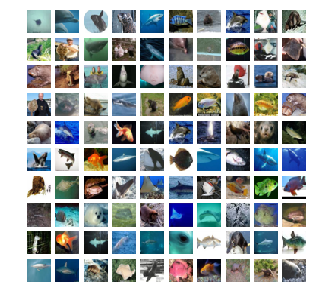

In [5]:
train = []
y = []
test = []
y_test = []
for i in range(len(train_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if train_data[b'coarse_labels'][i] == j:
            train.append(train_data[b'data'][i])
            y.append(j)
            break

for i in range(len(test_data[b'coarse_labels'])):
    for j in interesting_coarse_labels:
        if test_data[b'coarse_labels'][i] == j:
            test.append(test_data[b'data'][i])
            y_test.append(j)
            break

train = np.array(train)
y = np.array(y)
test = np.array(test)
y_test = np.array(y_test)
train_reshaped = train.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)
test_reshaped = test.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

# Visualizing CIFAR 100
fig, axes = plt.subplots(10, 10, figsize=(5, 5))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(train_reshaped)))
        axes[j][k].set_axis_off()
        axes[j][k].imshow(train_reshaped[i:i + 1][0])


In [6]:
import numpy as np


class LogisticRegression:
    def __init__(self):
        self.X = None
        self.y = None
        self.w = None
        pass

    @staticmethod
    def loss(y, ypred):
        ypred = ypred - np.max(ypred, axis=1).reshape((len(ypred), 1))
        indices = [np.arange(len(y)), y]
        correct_scores = np.exp(ypred[indices])
        probability = correct_scores / np.sum(np.exp(ypred), axis=1)  # cross entropy
        return -np.sum(np.log(probability))

    def train(self, X, y):
        number_of_samples = np.shape(X)[1]
        bias = np.repeat(1, number_of_samples).reshape((1, number_of_samples))
        self.X = np.concatenate((bias, X))
        self.y = y
        labels_count = len(np.unique(self.y))
        self.w = np.zeros((labels_count, np.shape(self.X)[0]))
        ypred = self.w.dot(self.X)
        return self.w

    def predict(self, x_test):
        sorted_indexes = np.argsort(np.sum(np.abs(self.X - x_test), axis=(1, 2, 3)))[:self.k]
        return np.add(np.max(self.y[sorted_indexes]), self.b)  # y = wx+b

    def accuracy(self, test, y_test):
        success = 0
        for i in range(len(test)):
            if self.predict(test[i]) == y_test[i]:
                success += 1
        print(success)
        return (success / len(test)) * 100


In [7]:
nn = LogisticRegression()
train_reshaped = np.transpose(train)
np.shape(nn.train(train_reshaped, y))
# nn.accuracy(test_reshaped, y_test)

(2, 3073)